<a href="https://colab.research.google.com/github/riddhikaa/csir_npl_work/blob/main/pca_millets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd


In [6]:
# from google.colab import files
# doc=files.upload()


In [7]:
df = pd.read_excel('/content/millets_dataset_dec_may_june.xlsx')

In [8]:
df.head()
# df.describe()

,nm,2500,2498,2496,2494,2492,2490,2488,2486,2484,...,268,266,264,262,260,258,256,254,252,250
0,Bajra,21.06,17.80,15.75,18.71,17.74,21.52,18.73,17.14,19.32,...,19.03,19.24,19.48,19.74,19.65,20.02,20.31,20.55,20.68,20.84
1,Bajra,16.67,19.11,19.53,18.04,19.75,19.65,18.08,17.96,19.28,...,19.86,19.91,20.23,20.31,20.63,20.88,21.14,21.53,21.64,21.89
2,GHB1129,18.27,17.19,18.36,20.61,18.66,20.41,19.59,19.68,17.26,...,20.10,20.23,20.38,20.68,21.08,21.07,21.44,21.41,21.63,21.99
3,GHB1129,16.75,18.57,18.30,17.20,19.41,16.13,18.42,18.99,17.54,...,20.28,20.40,20.73,20.80,21.12,21.32,21.65,21.87,22.05,22.27
4,GHB1129,16.70,19.47,15.39,17.40,18.57,18.62,20.29,19.23,19.34,...,20.62,20.90,21.09,21.19,21.57,21.89,22.03,22.37,22.63,22.81


In [17]:
grain_names= df['nm']
wavelengths = df.columns[1:]
absorption_levels = df[wavelengths]

In [18]:
grain_names
# wavelengths
absorption_levels

,2500,2498,2496,2494,2492,2490,2488,2486,2484,2482,...,268,266,264,262,260,258,256,254,252,250
0,21.06,17.80,15.75,18.71,17.74,21.52,18.73,17.14,19.32,21.27,...,19.03,19.24,19.48,19.74,19.65,20.02,20.31,20.55,20.68,20.84
1,16.67,19.11,19.53,18.04,19.75,19.65,18.08,17.96,19.28,20.54,...,19.86,19.91,20.23,20.31,20.63,20.88,21.14,21.53,21.64,21.89
2,18.27,17.19,18.36,20.61,18.66,20.41,19.59,19.68,17.26,18.64,...,20.10,20.23,20.38,20.68,21.08,21.07,21.44,21.41,21.63,21.99
3,16.75,18.57,18.30,17.20,19.41,16.13,18.42,18.99,17.54,18.77,...,20.28,20.40,20.73,20.80,21.12,21.32,21.65,21.87,22.05,22.27
4,16.70,19.47,15.39,17.40,18.57,18.62,20.29,19.23,19.34,17.17,...,20.62,20.90,21.09,21.19,21.57,21.89,22.03,22.37,22.63,22.81
5,21.84,19.74,22.01,21.60,20.54,20.01,22.25,19.74,21.13,22.32,...,21.37,21.65,21.92,22.17,22.44,22.69,22.83,23.12,23.04,23.45
6,19.90,20.50,18.79,20.66,18.91,18.42,18.70,21.29,20.17,20.19,...,21.95,21.90,22.41,22.43,22.85,23.19,23.32,23.34,23.59,23.79
7,19.38,21.41,20.74,19.67,18.71,18.83,20.37,19.84,21.47,21.42,...,23.41,23.81,24.01,24.19,24.74,25.06,25.26,25.59,25.75,25.92
8,22.48,21.63,22.38,21.06,22.84,20.47,21.95,22.12,22.94,22.99,...,21.76,22.12,22.34,22.38,22.75,22.97,23.15,23.53,23.70,23.98
9,19.71,20.25,20.68,16.54,21.33,19.59,20.46,19.30,19.14,20.99,...,22.54,22.72,22.80,23.11,23.36,23.68,24.07,24.19,24.58,24.58


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


x_standardized = scaler.fit_transform(absorption_levels)


In [20]:
from sklearn.decomposition import PCA

pca_2d = PCA(2)
principalComponents_2d = pca_2d.fit_transform(x_standardized)
pca_3d = PCA(3)
principalComponents_3d = pca_3d.fit_transform(x_standardized)

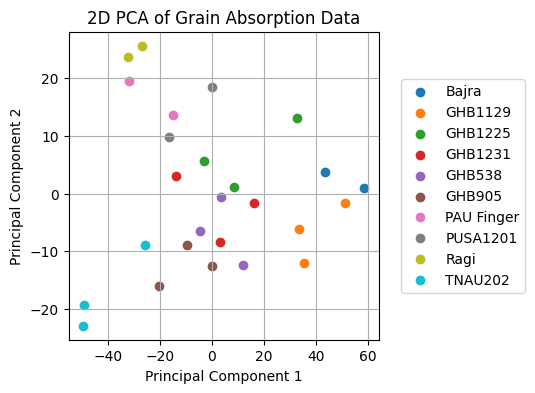

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
for grain in grain_names.unique():
    indices = grain_names == grain
    plt.scatter(principalComponents_2d[indices, 0], principalComponents_2d[indices, 1], label=grain)

plt.title('2D PCA of Grain Absorption Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.grid(True)
plt.show()

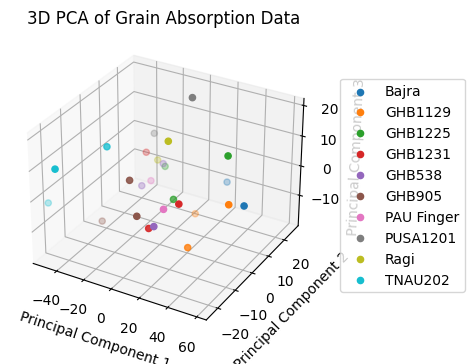

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')

for grain in grain_names.unique():
    indices = grain_names == grain
    ax.scatter(principalComponents_3d[indices, 0],
               principalComponents_3d[indices, 1],
               principalComponents_3d[indices, 2],
               label=grain)

ax.set_title('3D PCA of Grain Absorption Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.show()